# Basica Reccomender System (Collaborative Filtering: Item Based)

In [58]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot

In [2]:
# Data 
orders = pd.read_csv('../data/raw/olist_orders_dataset.csv')
reviews = pd.read_csv('../data/raw/olist_order_reviews_dataset.csv')
customers = pd.read_csv('../data/raw/olist_customers_dataset.csv')
products = pd.read_csv('../data/raw/olist_order_items_dataset.csv')

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


I will need to merge these three DataFrames:
* orders.customer_id = customers.customer_id
* orders.order_id = reviews.order_id
* orders.order_id  = product.order_id

I also only need particular columns from each DF:
* orders = order_id, customer_id, order_purchase_timestamp
* customers = customer_id, customer_unique_id
* reviews = order_id, review_score
* products = order_id, product_id

In [7]:
# Drop Unwanted Columns
orders = orders[['order_id','customer_id','order_purchase_timestamp']]
customers = customers[['customer_id','customer_unique_id']]
reviews = reviews[['order_id','review_score']]
products = products[['order_id','product_id']]

I want the final table to look like:

customer_unique_id | product_id | review_score | order_purchase_timestamp
------|--------|--------|--------|
861eff4711a542e4b93843c6dd7febb0 | 4244733e06e7ecb4970a6e2683c13e61 | 4 | 2017-10-02 10:56:33

In [8]:
df_merged = pd.merge(orders,customers, left_on='customer_id',right_on='customer_id', how='outer')
df_merged = pd.merge(df_merged,reviews, left_on='order_id', right_on='order_id', how='left') # will add NaN if no review given
df_merged = pd.merge(df_merged,products, left_on='order_id',right_on='order_id', how='outer')
df_merged.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,review_score,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,4.0,87285b34884572647811a353c7ac498a
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,4.0,595fac2a385ac33a80bd5114aec74eb8
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,5.0,aa4383b373c6aca5d8797843e5594415
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,5.0,d0b61bfb1de832b15ba9d266ca96e5b0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,5.0,65266b2da20d04dbe00c5c2d3bb7859e


In [9]:
df_merged['customer_id'].value_counts()

be1c4e52bb71e0c54b11a26b8e8d59f2    22
fc3d1daec319d62d49bfb5e1f83123e9    21
bd5d39761aa56689a265d95d8d32b8be    20
be1b70680b9f9694d8c70f41fa3dc92b    20
10de381f8a8d23fff822753305f71cae    15
                                    ..
30fb0bd8a8a4c9d315bbaf6bd295581f     1
e0b0809fbdc11e448ee71e40402ee734     1
fbc52509a4028b608472c6b923136fc9     1
438df7b1a12e7eb43f99b35531167e0a     1
edb027a75a1449115f6b43211ae02a24     1
Name: customer_id, Length: 99441, dtype: int64

In [10]:
df_merged['customer_unique_id'].value_counts()

d97b3cfb22b0d6b25ac9ed4e9c2d481b    24
c8460e4251689ba205045f3ea17884a1    24
4546caea018ad8c692964e3382debd19    21
c402f431464c72e27330a67f7b94d4fb    20
698e1cf81d01a3d389d96145f7fa6df8    20
                                    ..
70427fab453fbd1bb2c7275c8ee829df     1
a6155038b33cb1cc9ee39e606dc2bec6     1
145ec316f5428699441bb4e42ee44280     1
324aff19bfd305d68b252b84fd0cab28     1
60350aa974b26ff12caad89e55993bd6     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [11]:
# Looking at specific customer
df_merged.loc[df_merged['customer_unique_id'] =='c8460e4251689ba205045f3ea17884a1'].sort_values(by='order_purchase_timestamp')

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,review_score,product_id
42492,cb1f3a44e8b8527e16913306a4d3de2f,dbe9495069f4ddb6875dfc83462d616f,2018-08-07 09:03:02,c8460e4251689ba205045f3ea17884a1,4.0,e7cc48a9daff5436f63d3aad9426f28b
42493,cb1f3a44e8b8527e16913306a4d3de2f,dbe9495069f4ddb6875dfc83462d616f,2018-08-07 09:03:02,c8460e4251689ba205045f3ea17884a1,4.0,e7cc48a9daff5436f63d3aad9426f28b
42494,cb1f3a44e8b8527e16913306a4d3de2f,dbe9495069f4ddb6875dfc83462d616f,2018-08-07 09:03:02,c8460e4251689ba205045f3ea17884a1,4.0,e7cc48a9daff5436f63d3aad9426f28b
42495,cb1f3a44e8b8527e16913306a4d3de2f,dbe9495069f4ddb6875dfc83462d616f,2018-08-07 09:03:02,c8460e4251689ba205045f3ea17884a1,4.0,e7cc48a9daff5436f63d3aad9426f28b
42496,cb1f3a44e8b8527e16913306a4d3de2f,dbe9495069f4ddb6875dfc83462d616f,2018-08-07 09:03:02,c8460e4251689ba205045f3ea17884a1,4.0,e7cc48a9daff5436f63d3aad9426f28b
42497,cb1f3a44e8b8527e16913306a4d3de2f,dbe9495069f4ddb6875dfc83462d616f,2018-08-07 09:03:02,c8460e4251689ba205045f3ea17884a1,4.0,e7cc48a9daff5436f63d3aad9426f28b
84310,3e073b27114fe955e184db124d34a566,6ad78e330d6e0f3dfc471115f17371ea,2018-08-07 16:35:35,c8460e4251689ba205045f3ea17884a1,4.0,e7cc48a9daff5436f63d3aad9426f28b
84309,3e073b27114fe955e184db124d34a566,6ad78e330d6e0f3dfc471115f17371ea,2018-08-07 16:35:35,c8460e4251689ba205045f3ea17884a1,4.0,e7cc48a9daff5436f63d3aad9426f28b
84308,3e073b27114fe955e184db124d34a566,6ad78e330d6e0f3dfc471115f17371ea,2018-08-07 16:35:35,c8460e4251689ba205045f3ea17884a1,4.0,e7cc48a9daff5436f63d3aad9426f28b
84307,3e073b27114fe955e184db124d34a566,6ad78e330d6e0f3dfc471115f17371ea,2018-08-07 16:35:35,c8460e4251689ba205045f3ea17884a1,4.0,e7cc48a9daff5436f63d3aad9426f28b


It looks like this customer has bought the same product many times! We now need to drop the unused columns (order_id and customer_id) and then drop the duplicates

In [12]:
# Only want columns stated above
cols = ['customer_unique_id','product_id','review_score','order_purchase_timestamp']
df_merged = df_merged[cols]
df_merged.head()

,customer_unique_id,product_id,review_score,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,4.0,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,4.0,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,5.0,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,5.0,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,5.0,2018-02-13 21:18:39


In [13]:
# Drop Duplicate rows (based on customer, product and review)
print(f"Before dropping duplicates we have {df_merged.shape[0]} rows in our merged dataframe")
df_merged = df_merged.sort_values(by='order_purchase_timestamp').drop_duplicates(subset=['customer_unique_id','product_id','review_score'])
print(f"After dropping duplicates we have {df_merged.shape[0]} rows in our merged dataframe")

Before dropping duplicates we have 114092 rows in our merged dataframe
After dropping duplicates we have 103124 rows in our merged dataframe


In [14]:
df_merged.loc[df_merged['customer_unique_id'] =='c8460e4251689ba205045f3ea17884a1'].sort_values(by='order_purchase_timestamp') # dropping worked!

,customer_unique_id,product_id,review_score,order_purchase_timestamp
42497,c8460e4251689ba205045f3ea17884a1,e7cc48a9daff5436f63d3aad9426f28b,4.0,2018-08-07 09:03:02


In [15]:
# Which customers bought and reviewed the most amount of products
df_merged['customer_unique_id'].value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    16
3e43e6105506432c953e165fb2acf44c    13
1b6c7548a2a1f9037c1fd3ddfed95f33     9
ca77025e7201e3b30c44b472ff346268     9
35ecdf6858edc6427223b64804cf028e     8
                                    ..
83eb047458c1950e6622f517dd7a4ace     1
248ffe10d632bebe4f7267f1f44844c9     1
a0621f39c9e44951cddb38da9088bea6     1
05cf4ddb31059a169df61046881d812f     1
87ab9fec999db8bd5774917de3cdf01c     1
Name: customer_unique_id, Length: 96096, dtype: int64

### Table is Clean - Let's do some checks

In [16]:
# Create a copy for ease of use
df = df_merged.copy()
df.head()

,customer_unique_id,product_id,review_score,order_purchase_timestamp
5143,b7d76e111c89f7ebf14761390f0f7d17,c1488892604e4ba5cff5b4eb4d595400,1.0,2016-09-04 21:15:19
5144,b7d76e111c89f7ebf14761390f0f7d17,f293394c72c9b5fafd7023301fc21fc2,1.0,2016-09-04 21:15:19
4982,4854e9b3feff728c13ee5fc7d1547e92,f3c2d01a84c947b078e32bbef0718962,1.0,2016-09-05 00:15:34
11473,009b0127b727ab0ba422f6d9604487c7,NaN,1.0,2016-09-13 15:24:19
35233,830d5b7aaa3b6f1e9ad63703bec97d23,5a6b04657a4c5ee34285d1e4619a96b4,1.0,2016-09-15 12:16:38


In [17]:
df.shape

(103124, 4)

In [18]:
# Check distrubiton of scores
df['review_score'].value_counts()

5.0    58396
4.0    19551
1.0    12381
3.0     8548
2.0     3432
Name: review_score, dtype: int64

In [19]:
df.isna().sum()

customer_unique_id            0
product_id                  762
review_score                816
order_purchase_timestamp      0
dtype: int64

In [20]:
df['customer_unique_id'].nunique()

96096

In [21]:
customers['customer_unique_id'].nunique()

96096

I'm not sure why there is more unique `customer_unique_id` in the customers DF. We must have lost some customers in our merging.

After testing I have found that the missing customer Id came from merging the df with the `products`. I have no switched this to outer

In [31]:
# Looking at the rows with missing values
df[df.isna().any(axis=1)].sample(10)

,customer_unique_id,product_id,review_score,order_purchase_timestamp
16273,291c0ff050cf97149f73b6d78705b090,f5889057b0c061390ce20f4b7b842ac0,NaN,2018-06-26 23:44:15
113027,001ae44fa04911a9e9577356dce6c63c,39d4f8671e6c7b08d7d0036f4f46390f,NaN,2017-11-06 17:35:49
76589,df569c11f683341b1700e5fb24b76416,8c5de6354d95c9a3cd8243bbab60d301,NaN,2017-08-14 14:38:17
92981,b703d83e085a6a8b339dc548f4878ca8,NaN,4.0,2017-12-01 01:42:22
8256,046ed33aa8bef51855af6010a11a835c,NaN,1.0,2016-10-10 09:51:13
19037,a93a1c70bbdda31e28bd21e21d6901a5,2ffdf10e724b958c0f7ea69e97d32f64,NaN,2018-03-18 00:23:20
82806,88928f221be6f07b3571aad59adbdbb4,NaN,2.0,2018-01-14 19:24:28
110343,2f7853759e65f9ee58e4fad9d5dc6b67,7e6c4a0bf900e259f50ba63331fd2785,NaN,2017-09-10 21:16:47
19422,e766d6037aba1856e72cff53bc3f1115,NaN,2.0,2018-05-08 10:13:06
100087,042b009cdd1ef1d0e9b74e35691cad8d,7612afaa8218e79b3011243ed9edea9c,NaN,2018-01-27 12:32:23


Ok so we have some orders where the `product_id` is unknown. These columns are useless to us, because we need to know which product is being reviewed. 

In [61]:
# Looking for which products have the highest  review score
avg_score_df = df.groupby('product_id')['review_score'].mean().to_frame().rename(columns={'review_score':'avg_score'})
avg_score_df.sort_values(by = 'avg_score',ascending=False)

,avg_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
c6a5b2b8610b3206be072c211b70ba69,5.0
5ffeff2ac45b628674ce03e75ce4d6e3,5.0
6000cda32a1e7f6919ae1fcdf1d6259a,5.0
c6bdd07f0a20ccd19d51de91c1551952,5.0
...,...
f7641ea085e47945ed59b892a0e2fb4a,NaN
f77f18b15df7b13a76cac068e285eb78,NaN
f87e8ee07e668908ab8afef6e3e91dec,NaN


A lot of 5.0. I wonder if these same products have only been reviewed once. Let's now check how many times a each product has been reviewed:

In [62]:
# How many reviews for each product
num_rev_df = df.groupby('product_id')['review_score'].count().to_frame().rename(columns={'review_score':'num_reviews'})
num_rev_df.sort_values(by='num_reviews', ascending=False)

,num_reviews
product_id,
99a4788cb24856965c36a24e339b6058,460
aca2eb7d00ea1a7b8ebd4e68314663af,428
422879e10f46682990de24d770e7f83d,351
d1c427060a0f73f6b889a5c7c61f2ac4,320
389d119b48cf3043d311335e499d9c6b,310
...,...
f87e8ee07e668908ab8afef6e3e91dec,0
1bc1199ed7fbe6f13ea973952868b93e,0
d48e60abb2b51506a3d71d3552db7f96,0


In [95]:
# Merge these two to see avg score and num reviews
ratings = pd.merge(avg_score_df, num_rev_df, left_index=True, right_index=True)
ratings.sort_values('avg_score', ascending=False)[:20]

,avg_score,num_reviews
product_id,,
00066f42aeeb9f3007548bb9d3f33c38,5.0,1
c6a5b2b8610b3206be072c211b70ba69,5.0,1
5ffeff2ac45b628674ce03e75ce4d6e3,5.0,1
6000cda32a1e7f6919ae1fcdf1d6259a,5.0,1
c6bdd07f0a20ccd19d51de91c1551952,5.0,1
c6bc6e6265a9e3e202b0e843c983e77f,5.0,1
6004f0ea115c80b51e2f0e434233c0ca,5.0,1
60061c870d0d52a2c5bc678d56538fdd,5.0,1
c6b0d66ba7993cb94d4a19d1578ba802,5.0,1


Check if some of these reviews that have perfect 5.0 avg, also only have 1 review

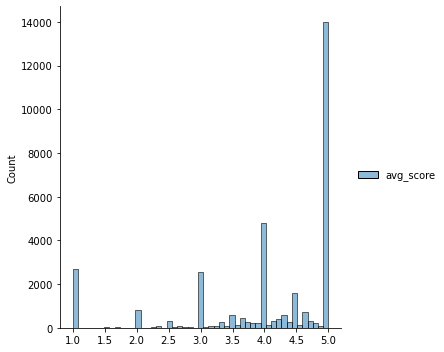

In [63]:
sns.displot(avg_score_df)

In [73]:
# Create list of 5.0 avgerage products
five_star = avg_score_df.loc[avg_score_df['avg_score'] == 5.0].index.to_list()
num_rev_df.loc[num_rev_df.index.isin(five_star)].sort_values(by='num_reviews', ascending=False)

,num_reviews
product_id,
2722b7e5f68e776d18fe901638034e54,13
4c8b28305f570899b6ded964ddd234a9,11
59c1840441f4df065f52760bf51a8442,11
8173ca41cdb176462f9ae79821a48404,11
b9ee7519d0187d2389af62ba6c612963,10
...,...
1ce0e963805e3c170485768e8b09fe65,1
724bdb3b1f6738521676856d7577e451,1
724c49c346d2979339d366fa59ce49de,1


Ok so not all of them have 1 review. In fact some of them have lots (13 max) reviews! Let's search our original dataframe for that product, to see if indeed they just have a perfect score!

In [74]:
df.loc[df['product_id'] == '2722b7e5f68e776d18fe901638034e54']

,customer_unique_id,product_id,review_score,order_purchase_timestamp
88437,1a8f440d294f097d3337b42a8752931c,2722b7e5f68e776d18fe901638034e54,5.0,2018-06-20 22:58:49
57837,57f0ea1c7f6b9ef8615c0a0b8f06fe57,2722b7e5f68e776d18fe901638034e54,5.0,2018-06-21 14:34:17
86108,09e3b78372517508280cb92962edb83e,2722b7e5f68e776d18fe901638034e54,5.0,2018-06-21 16:50:33
4560,cf58b6fd429433b7e185b6e6453a8c9a,2722b7e5f68e776d18fe901638034e54,5.0,2018-06-21 18:54:50
29234,70385f2723b5983e2102dd4b06a266eb,2722b7e5f68e776d18fe901638034e54,5.0,2018-06-23 16:36:08
3863,c39dde4fcf03b0f67755c39f124a414f,2722b7e5f68e776d18fe901638034e54,5.0,2018-06-25 12:25:23
102767,84b12444366b9faa348c5111bcc9a27c,2722b7e5f68e776d18fe901638034e54,5.0,2018-06-27 01:31:41
47084,1799b452e02f154046e2609416569aa9,2722b7e5f68e776d18fe901638034e54,5.0,2018-07-04 16:10:42
54976,f6b302dfdccd73ddaa8be6c08baea909,2722b7e5f68e776d18fe901638034e54,5.0,2018-07-05 16:18:39
30651,8790e13abb73b966cdb15451644e2fb6,2722b7e5f68e776d18fe901638034e54,5.0,2018-07-05 17:24:53


WOW! They do indeed have a perfect review history. This seems like a pretty good product (although it still was only reviewed 13 times, which isn't all that much). 

In [90]:
print(f"There are {df['customer_unique_id'].nunique()} unique customers.")
print(f"There are {df['product_id'].nunique()} unique products.")

There are 96096 unique customers.
There are 32951 unique products.


## Recommendation System

In [89]:
# first we need to pivot the DataFrame so that each user is a row, and each item is a columns
# The user review for that item will be the value
matrix = df.pivot_table(index='customer_unique_id', columns='product_id', values= 'review_score')
matrix.head()

C:\Users\bwolk\anaconda3\lib\site-packages\pandas\core\reshape\reshape.py:130: RuntimeWarning: overflow encountered in long_scalars
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed

In [88]:
df['product_id'].nunique()

32951